In [1]:
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np
%matplotlib inline

In [2]:
SMALL_SIZE = 17
MEDIUM_SIZE = 18
BIGGER_SIZE = 19

plt.rcParams.update({
                "font.family": "serif",
                "text.usetex": True,
                "pgf.rcfonts": False,
                "pgf.texsystem": 'pdflatex',  # default is xetex
            })

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
undecimated = "undecimated_"
radiotelescope = "delta_jvla"

In [5]:
means_file = undecimated+"wavelet_"+radiotelescope+"_means.npy"

In [6]:
stds_file = undecimated+"wavelet_"+radiotelescope+"_stds.npy"

In [7]:
scenarios_means = np.load(means_file)
scenarios_stds = np.load(stds_file)

In [8]:
scenarios_means.shape

(3, 4, 6)

In [9]:
families=np.array(["bior", "coif", "db", "dmey", "rbio", "sym"])

In [10]:
used_idxs = np.where((families!="bior") & (families!="rbio"))

In [11]:
scenarios_means = scenarios_means[:,:, used_idxs].squeeze()

In [12]:
scenarios_stds = scenarios_stds[:,:, used_idxs].squeeze()

In [13]:
use_wavelet = ["coif", "db", "dmey", "sym"]
# use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
#idx_coif = [use_wavelet.index("coif") - 0.5, use_wavelet.index("db") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio") - 0.5, use_wavelet.index("sym") - 0.5]

In [14]:
# Getting minimum AICs
idx_sc1 = np.argmin(scenarios_means[0, 2])
idx_sc2 = np.argmin(scenarios_means[1, 2])
idx_sc3 = np.argmin(scenarios_means[2, 2])

In [15]:
print("Scenario 1: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc1], scenarios_means[0, 2, idx_sc1], scenarios_stds[0, 2, idx_sc1]))
print("Scenario 2: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc2], scenarios_means[1, 2, idx_sc2], scenarios_stds[1, 2, idx_sc2]))
print("Scenario 3: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc3], scenarios_means[2, 2, idx_sc3], scenarios_stds[2, 2, idx_sc3]))

Scenario 1: Best AIC Wavelet family db : -21337.22 \pm 609.91
Scenario 2: Best AIC Wavelet family sym : -20200.95 \pm 675.52
Scenario 3: Best AIC Wavelet family sym : -19482.87 \pm 682.78


In [16]:
print("Scenario 1: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc1], scenarios_means[0, 3, idx_sc1], scenarios_stds[0, 3, idx_sc1]))
print("Scenario 2: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc2], scenarios_means[1, 3, idx_sc2], scenarios_stds[1, 3, idx_sc2]))
print("Scenario 3: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc3], scenarios_means[2, 3, idx_sc3], scenarios_stds[2, 3, idx_sc3]))

Scenario 1: Best BIC Wavelet family db : -16287.42 \pm 2224.96
Scenario 2: Best BIC Wavelet family sym : -12638.27 \pm 2538.67
Scenario 3: Best BIC Wavelet family sym : -10337.41 \pm 2574.93


In [17]:
print("Scenario 1: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc1], scenarios_means[0, 0, idx_sc1], scenarios_stds[0, 0, idx_sc1]))
print("Scenario 2: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc2], scenarios_means[1, 0, idx_sc2], scenarios_stds[1, 0, idx_sc2]))
print("Scenario 3: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(use_wavelet[idx_sc3], scenarios_means[2, 0, idx_sc3], scenarios_stds[2, 0, idx_sc3]))

Scenario 1: Best PSNR Wavelet family db : 133.30 \pm 8.45
Scenario 2: Best PSNR Wavelet family sym : 100.04 \pm 6.47
Scenario 3: Best PSNR Wavelet family sym : 115.57 \pm 9.26


In [18]:
print("Scenario 1: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(use_wavelet[idx_sc1], scenarios_means[0, 1, idx_sc1]*10**5, scenarios_stds[0, 1, idx_sc1]*10**5))
print("Scenario 2: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(use_wavelet[idx_sc2], scenarios_means[1, 1, idx_sc2]*10**5, scenarios_stds[1, 1, idx_sc2]*10**5))
print("Scenario 3: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(use_wavelet[idx_sc3], scenarios_means[2, 1, idx_sc3]*10**5, scenarios_stds[2, 1, idx_sc3]*10**5))

Scenario 1: Best RMSE Wavelet family db : (70.71 \pm 2.21)*1e-5
Scenario 2: Best RMSE Wavelet family sym : (75.32 \pm 2.40)*1e-5
Scenario 3: Best RMSE Wavelet family sym : (78.44 \pm 2.94)*1e-5


In [19]:
#coif2_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "coif2"][0]
#sym6_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "sym6"][0]

In [20]:
#print("AIC Scenario 2 coif2: "+str(scenarios_means[1, 2, coif2_idx]))

In [21]:
#print("AIC Scenario 2 sym6: "+str(scenarios_means[1, 2, sym6_idx]))

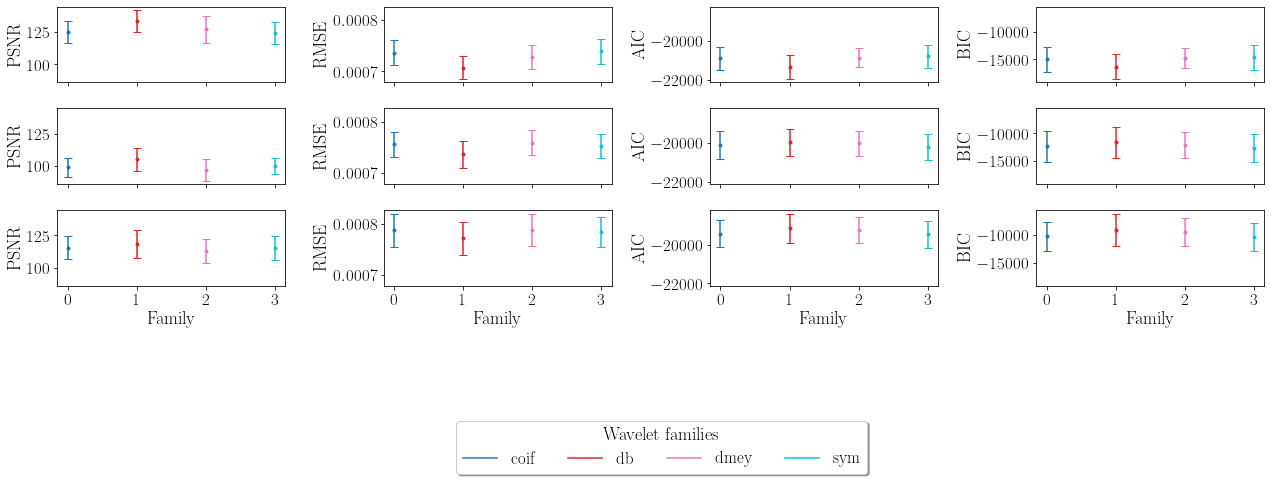

In [22]:
_id = np.arange(0, nwavelets)
names = ["PSNR", "RMSE", "AIC", "BIC"]  
fig, ax = plt.subplots(nrows=scenarios_means.shape[0], ncols=len(names), sharey='col', sharex='all', figsize=(18, 5))
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, nwavelets)]

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i,j].plot(_id[k], scenarios_means[i,j,k], label=use_wavelet[k], color=colors[k])
            ax[i,j].errorbar(_id[k], scenarios_means[i,j,k], yerr = scenarios_stds[i,j,k], fmt ='.', capsize=4, color=colors[k])
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i,j].set_ylabel(names[j])
        if i==2:
            ax[i,j].set_xlabel("Family")

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)
            
#for i in range(scenarios_means.shape[0]):
    #ax[i,1].set_ylim([0,0.0015])
    #ax[i,2].set_ylim([-25000,-20000])
    #ax[i,3].set_ylim([-25000,-20000])

    #ax[i,2].set_ylim([-25000,-15000]) #undecimated
    #ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = "families_"+undecimated+"wavelets_"+radiotelescope+".pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0,0].get_legend_handles_labels()
legend = fig.legend(h, l, loc='lower center', ncol=18, fancybox=True, bbox_to_anchor=[0.52, -0.375], shadow=True, title="Wavelet families")
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)   # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')#